E-commerce Sales Data Analysis using MACHINE LEARNING 

In [1]:
#Reading all data files....
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files
uploaded_order = files.upload()

Saving orders.csv to orders.csv


In [ ]:
import io
order = pd.read_csv(io.BytesIO(uploaded_order['orders.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
from google.colab import files
uploaded_item = files.upload()

Saving items.csv to items.csv


In [ ]:
import io
item = pd.read_csv(io.BytesIO(uploaded_item['items.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
from google.colab import files
uploaded_product = files.upload()

Saving products.csv to products.csv


In [ ]:
import io
prod = pd.read_csv(io.BytesIO(uploaded_product['products.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
from google.colab import files
uploaded_customer = files.upload()

Saving customer.csv to customer.csv


In [ ]:
import io
cust = pd.read_csv(io.BytesIO(uploaded_customer['customer.csv']))
# Dataset is now stored in a Pandas Dataframe

# QUESTION 1 - How many items are there in customer orders ?
In orders how many items have been sold wil be equal to all unique product_ids in 'items' data.

In [ ]:
no_of_Items = item['product_id'].nunique()
print("Number of items in customer orders: "+str(no_of_Items))

Number of items in customer orders: 32951


# QUESTION 2 - What is the average basket ?
Average basket size refers to the average number of items getting sold in a single purchase. It is the equivalent of total units sold ÷ number of invoices.

In [ ]:
No_of_products = len(item.product_id)
Number_of_invoice = len(item.order_id.unique())
average_basket = No_of_products/Number_of_invoice
print("Total no unit sold = "+str(No_of_products))
print("Number of invoices = "+str(Number_of_invoice))
print("Aerage Basket Size is "+str(average_basket))

Total no unit sold = 112650
Number of invoices = 98666
Aerage Basket Size is 1.1417306873695092


# QUESTION 3 - What are the most frequent product categories ?

In [ ]:
items_df1 = item[['product_id','order_id']]
products_df1 = prod[['product_id','product_category_name']]
prod_withCategory = pd.merge(items_df1,products_df1,on='product_id',how='left')
prod_withCategory.info()
products_without_category = prod_withCategory[pd.isnull(prod_withCategory).any(axis=1)]
print("\nThere are products which do not have any category, hence removing those products for now. But there is another way by filling their values name-'OTHER' category.But by doing so, it can manipulate my result.For example :-")
products_without_category.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   product_id             112650 non-null  object
 1   order_id               112650 non-null  object
 2   product_category_name  111023 non-null  object
dtypes: object(3)
memory usage: 3.4+ MB

There are products which do not have any category, hence removing those products for now. But there is another way by filling their values name-'OTHER' category.But by doing so, it can manipulate my result.For example :-


,product_id,order_id,product_category_name
123,ff6caf9340512b8bf6d2a2a6df032cfa,0046e1d57f4c07c8c92ab26be8c3dfc0,NaN
125,a9c404971d1a5b1cbc2e4070e02731fd,00482f2670787292280e0a8153d82467,NaN
132,5a848e4ab52fd5445cdc07aab1c40e48,004f5d8f238e8908e6864b874eda3391,NaN
142,41eee23c25f7a574dfaf8d5c151dbb12,0057199db02d1a5ef41bacbf41f8f63b,NaN
171,e10758160da97891c2fdcbc35f0f031d,006cb7cafc99b29548d4f412c7f9f493,NaN


Removing rows which contains null values in category name.

There are total 71 categories of products.
Top 10 Frequent categories are :-
product_category_name
bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
housewares                6964
watches_gifts             5991
telephony                 4545
garden_tools              4347
auto                      4235
Name: product_category_name, dtype: int64


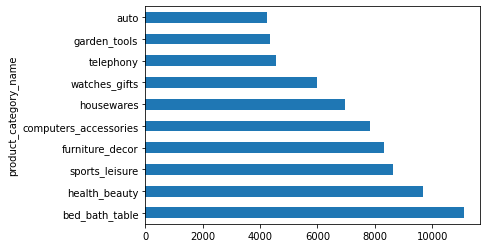

In [ ]:
prod_withCategory = prod_withCategory.dropna(how='any',axis=0) 
ProductCategory_withCount = prod_withCategory.groupby(['product_category_name'])['product_category_name'].count()
print("There are total "+str(len(ProductCategory_withCount))+ " categories of products.")
# --- For top 10 product Categories ---
n = 10
Top10_ProductCategory = ProductCategory_withCount.nlargest(n)
print("Top 10 Frequent categories are :-")
print(Top10_ProductCategory)
Top10_ProductCategory.plot(kind='barh')
plt.show()

# OUESTION 4 -  How do sales evolve over time ?

In [ ]:
print("Item table columns: ", item.columns)
print("Order table columns: ", order.columns)

Item table columns:  Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
Order table columns:  Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')


In [ ]:
#Inner join on "Item" and "Order" tables on "Order id"
item_order_joined = pd.merge(left=item, right=order, left_on='order_id', right_on='order_id')

In [ ]:
item_order_joined.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


delivered      110197
shipped          1185
canceled          542
invoiced          359
processing        357
unavailable         7
approved            3
Name: order_status, dtype: int64


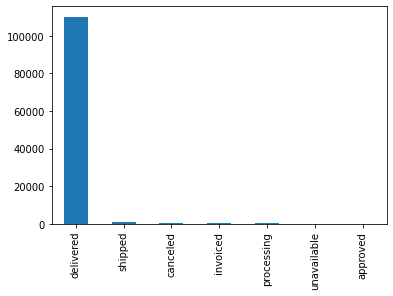

In [ ]:
#Checking "order_status" in "item_order_joined" table
print(item_order_joined.order_status.value_counts())
item_order_joined.order_status.value_counts().plot(kind='bar')

In [ ]:
#Keeping on "delivered" orders for the analysis as others won't count under sales
item_order_joined = item_order_joined[item_order_joined.order_status == "delivered"]

#Verifying the sub-setting
print(item_order_joined.order_status.value_counts())

delivered    110197
Name: order_status, dtype: int64


In [ ]:
item_order_joined.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

In [ ]:
#Keeping only "price" and "order_delivered_customer_date" columns for the analysis
item_order_table = item_order_joined[["order_delivered_customer_date", "price"]]
item_order_table.head(3)

,order_delivered_customer_date,price
0,2017-09-20 23:43:48,58.9
1,2017-05-12 16:04:24,239.9
2,2018-01-22 13:19:16,199.0


In [ ]:
#Keeping date only from "order_delivered_customer_date" column
item_order_table["order_delivered_customer_date"] = item_order_table["order_delivered_customer_date"].str.split(" ", expand = True)[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Sales Value')

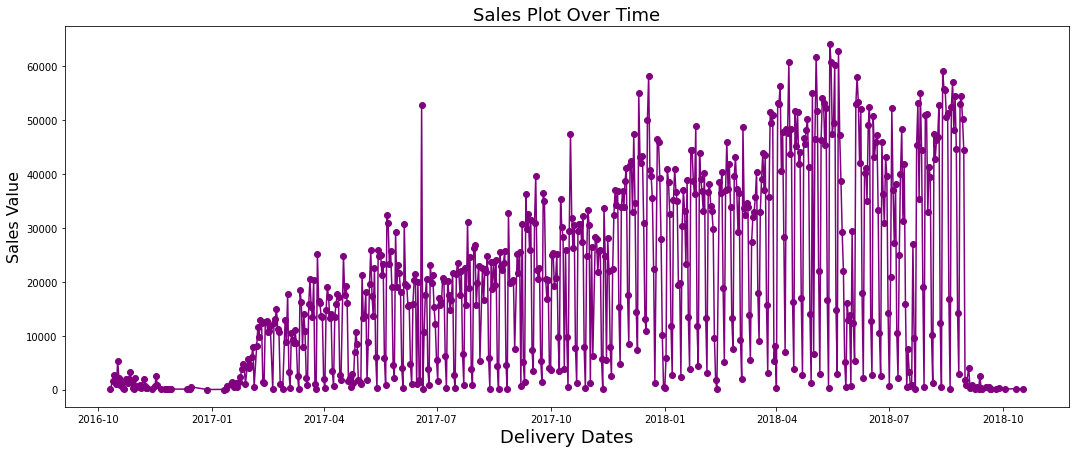

In [ ]:
#Plotting Sales evolution over time
fig, axes = plt.subplots(sharex=True, sharey=True, figsize=(18,7))

axes.plot(pd.to_datetime(item_order_table.groupby("order_delivered_customer_date")["price"].sum().index.values),
        item_order_table.groupby("order_delivered_customer_date")["price"].sum().values,
        '-o',
        color='purple')

#Set Figure Title
axes.set_title('Sales Plot Over Time',fontsize=18)

#Set x and y axis lables
plt.xlabel('Delivery Dates', fontsize=18)
plt.ylabel('Sales Value', fontsize=16)

# Sales evolution over time:
- Sales decreased in December 2016 and January 2017.
- Sales increased during the month of July-2017, January-2018, April-2018 and May-2018
- We can see sudden drop in sales after September-2018.

# QUESTION 5 - When are mostly people buying products ? Is there any difference by product category ?

In [ ]:
item_order_table.head(5)

,order_delivered_customer_date,price
0,2017-09-20,58.90
1,2017-05-12,239.90
2,2018-01-22,199.00
3,2018-08-14,12.99
4,2017-03-01,199.90


In [ ]:
#Extracting "Year", "Month" from Dates to understand trend of sales over the year
item_order_table["year"] = item_order_table["order_delivered_customer_date"].str.split("-", expand = True)[0]
item_order_table["month"] = item_order_table["order_delivered_customer_date"].str.split("-", expand = True)[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Sales Value')

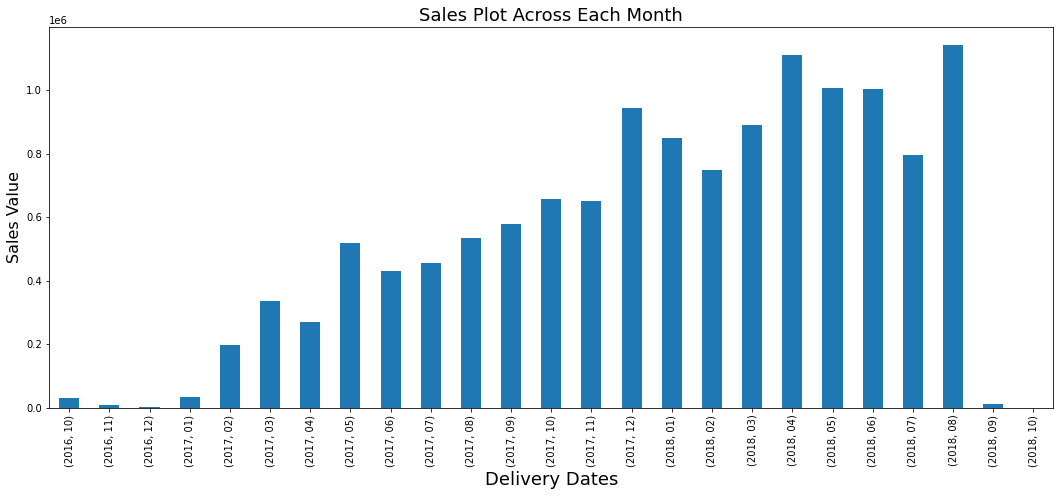

In [ ]:
#Plotting SALES distribution across each month of a year
fig, axes = plt.subplots(sharex=True, sharey=True, figsize=(18,7))

item_order_table.groupby(["year", "month"])["price"].sum().plot(kind="bar")

#Set Figure Title
axes.set_title('Sales Plot Across Each Month',fontsize=18)

#Set x and y axis lables
plt.xlabel('Delivery Dates', fontsize=18)
plt.ylabel('Sales Value', fontsize=16)

# Conclusion : When are mostly people buying products:
- The sale of products is very low in 2nd half of 2016. But we can see gradual increase in sales from February 2017 till October 2017.
- Although it remains same for the month of October and November 2017, we can see gradual increase and decrease in sales of products until August-2018.
- The purchase of products sharply decreases during the months of September and October 2018.

# Sales across each product category

In [ ]:
#Merge our pre merged table to fetch product category across each item
item_order_prod_joined = pd.merge(left=prod, right=item_order_joined, left_on='product_id', right_on='product_id')

In [ ]:
#Keeping only "Delivered" items
item_order_prod_joined = item_order_prod_joined[item_order_prod_joined.order_status == "delivered"]

#Verifying the sub-setting
print(item_order_prod_joined.order_status.value_counts())

delivered    110197
Name: order_status, dtype: int64


In [ ]:
#Creating a new table which consist of only 3 columns i.e. Date, Price, and Product category
item_order_prod_table = item_order_prod_joined[["order_delivered_customer_date", "price", "product_category_name"]]

In [ ]:
#Total Unique Product categories
print("Total Unique Product Categories are: ", item_order_prod_table.product_category_name.value_counts().count())

#Printing unique product categories
item_order_prod_table.product_category_name.value_counts()

Total Unique Product Categories are:  71


bed_bath_table               10953
health_beauty                 9465
sports_leisure                8431
furniture_decor               8160
computers_accessories         7644
                             ...  
arts_and_craftmanship           24
la_cuisine                      14
cds_dvds_musicals               14
fashion_childrens_clothes        7
security_and_services            2
Name: product_category_name, Length: 71, dtype: int64

In [ ]:
#Taking top 3 categories and identify trend in their sales

#Extracting "Year", "Month" from Dates to understand trend of sales over the year
item_order_prod_table["year"] = item_order_prod_table["order_delivered_customer_date"].str.split("-", expand = True)[0]
item_order_prod_table["month"] = item_order_prod_table["order_delivered_customer_date"].str.split("-", expand = True)[1]

#Top 3 product categories are: bed_bath_table, health_beauty, sports_leisure
item_order_prod_table = item_order_prod_table[item_order_prod_table["product_category_name"].isin(["bed_bath_table", "health_beauty", "sports_leisure"])]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


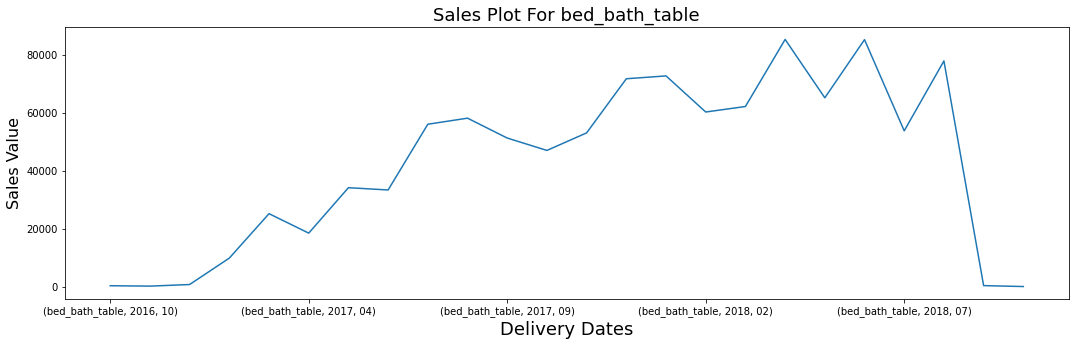

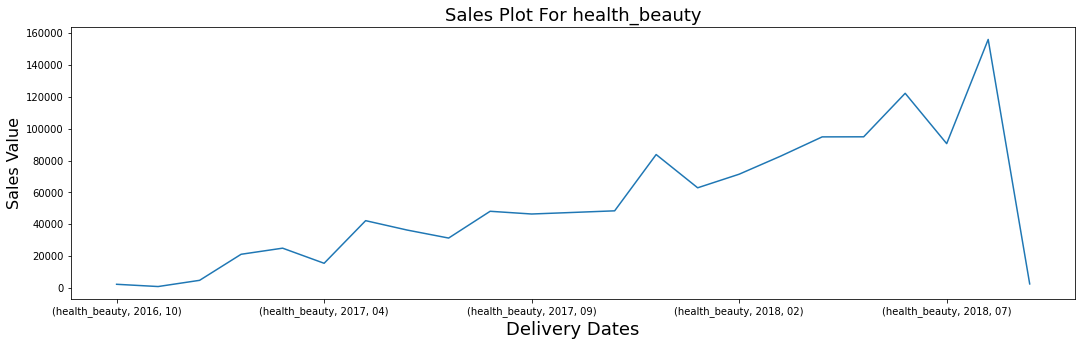

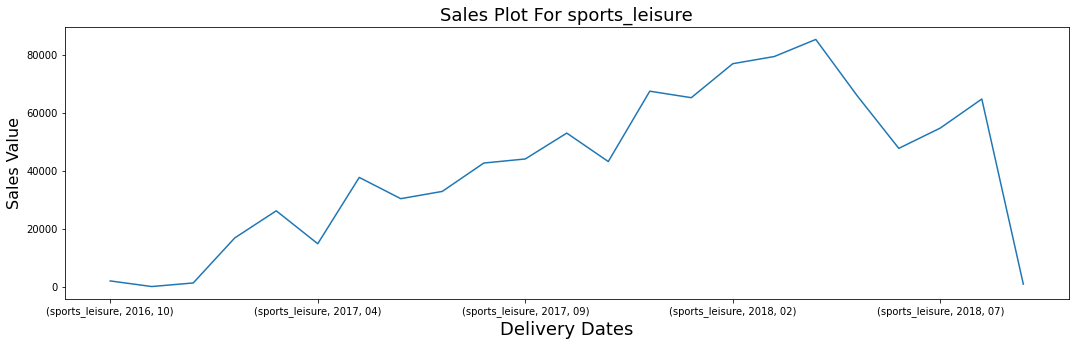

In [ ]:
#Plotting Product categorywise sales
prod_list = ["bed_bath_table", "health_beauty", "sports_leisure"]
for i, category in zip(range(1, len(prod_list)+1), prod_list):
    fig, axes = plt.subplots(sharex=True, sharey=True, figsize=(18,5))
    
    item_order_prod_table[item_order_prod_table.product_category_name == category].groupby(["product_category_name", "year", "month"])["price"].sum().plot()
    
    #Set Figure Title
    axes.set_title('Sales Plot For {}'.format(category),fontsize=18)

    #Set x and y axis lables
    plt.xlabel('Delivery Dates', fontsize=18)
    plt.ylabel('Sales Value', fontsize=16)
    
    plt.show()

# Sales for top 3 product categories:
- Bed Bath Table: We can see increasing trend for this category till February 2018. Later, it's sales increases and decreases for the next 6 months before steeply going down at the end of August 2018.
- Health Beauty: We can see increasing trend for this category till August 2018. It's sales suddenly starts decreasing from August 2018.
- Sports Leisure: We can see increasing trend for this category till March 2018. After which we can observe a decreasing trend until end of October 2018.

# QUESTION 6 - What are the best-sellers ? How do they weight in the sales ?

seller_id
4869f7a5dfa277a7dca6462dcf3b52b2    249640.70
7c67e1448b00f6e969d365cea6b010ab    239536.44
53243585a1d6dc2643021fd1853d8905    235856.68
4a3ca9315b744ce9f8e9374361493884    235539.96
fa1c13f2614d7b5c4749cbc52fecda94    204084.73
da8622b14eb17ae2831f4ac5b9dab84a    185192.32
7e93a43ef30c4f03f38b393420bc753a    182754.05
1025f0e2d44d7041d6cf58b6550e0bfa    172860.69
7a67c85e85bb2ce8582c35f2203ad736    162648.38
955fee9216a65b617aa5c0531780ce60    160602.68
Name: total_cost, dtype: float64


Text(0, 0.5, 'Seller')

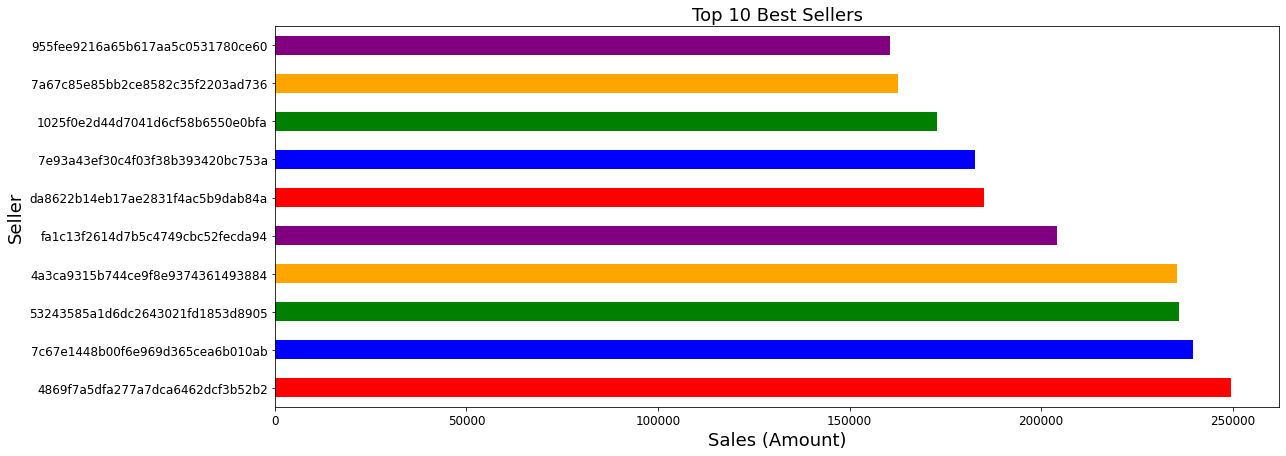

In [ ]:
#Fetchinging top 10 best sellers by sales and plotting them on a horizontal bar chart
fig, axes = plt.subplots(sharex=True, sharey=True, figsize=(18,7))

item['total_cost'] = item['price'] + item['freight_value']
items_df = item[['seller_id','total_cost']]
items_df.groupby("seller_id")["total_cost"].sum().\
sort_values(ascending=False)[:10].plot(kind='barh', color = ["red","blue","green","orange","Purple"],fontsize=12)

#Set Figure Title
axes.set_title('Top 10 Best Sellers',fontsize=18)
print(items_df.groupby("seller_id")["total_cost"].sum().\
sort_values(ascending=False)[:10])
#Set x and y axis lables
plt.xlabel('Sales (Amount)', fontsize=18)
plt.ylabel('Seller', fontsize=18)

# Best Sellers for period October 2016 till October 2018:
- 4869f7a5dfa277a7dca6462dcf3b52b2 seller is highest among all other sellers having sales of 249640.70.
- 7c67e1448b00f6e969d365cea6b010ab, 53243585a1d6dc2643021fd1853d8905 and 4a3ca9315b744ce9f8e9374361493884 sellers did almost equal sales with 239536.44, 235856.68 and 235539.96 respectively

# QUESTION 7 - Predict future sales volumes and explain.

In [ ]:
#Lets create a new dataframe with aggregated sales over time
#This dataframe will have only Sales date and Sales amount for that date 

agg_sales_joined = pd.merge(left=item, right=order, left_on='order_id', right_on='order_id')

#Keeping on "delivered" orders for the analysis as others won't count under sales
agg_sales_joined = agg_sales_joined[agg_sales_joined.order_status == "delivered"]

#Verifying the sub-setting
print(agg_sales_joined.order_status.value_counts())

#Keeping only "price" and "order_delivered_customer_date" columns for the analysis
agg_sales_table_temp = agg_sales_joined[["order_delivered_customer_date", "price"]]

#Keeping date only from "order_delivered_customer_date" column
agg_sales_table_temp["order_delivered_customer_date"] = agg_sales_table_temp["order_delivered_customer_date"].str.split(" ", expand = True)[0]

#See Temp data
print(agg_sales_table_temp.head(5))

#Finally Aggregating sales for each month and store it in a dataframe
agg_sales_table = agg_sales_table_temp.groupby("order_delivered_customer_date")["price"].sum()

delivered    110197
Name: order_status, dtype: int64
  order_delivered_customer_date   price
0                    2017-09-20   58.90
1                    2017-05-12  239.90
2                    2018-01-22  199.00
3                    2018-08-14   12.99
4                    2017-03-01  199.90


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [ ]:
agg_sales_table.head()

order_delivered_customer_date
2016-10-11     141.70
2016-10-13    1546.68
2016-10-14    2707.65
2016-10-15    2565.47
2016-10-16    1059.16
Name: price, dtype: float64

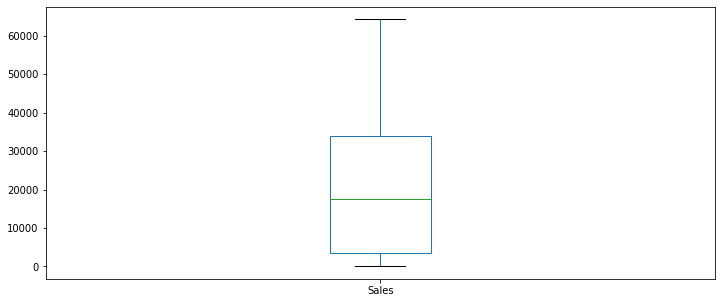

In [ ]:
import matplotlib.pyplot as plt
agg_sales_table.plot.box(label = 'Sales', figsize=(12,5))
plt.show()

# Perform Dickey-Fuller test:

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    #rolmean = pd.rolling_mean(timeseries, window=12)
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.rcParams["figure.figsize"] = [20,5]
    plt.show(block=False)
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
  

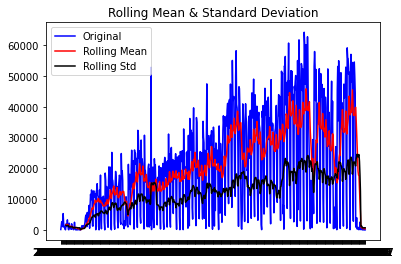

Results of Dickey-Fuller Test:
Test Statistic                  -2.309983
p-value                          0.168768
#Lags Used                      14.000000
Number of Observations Used    630.000000
Critical Value (1%)             -3.440772
Critical Value (5%)             -2.866139
Critical Value (10%)            -2.569219
dtype: float64


In [ ]:
test_stationarity(agg_sales_table)

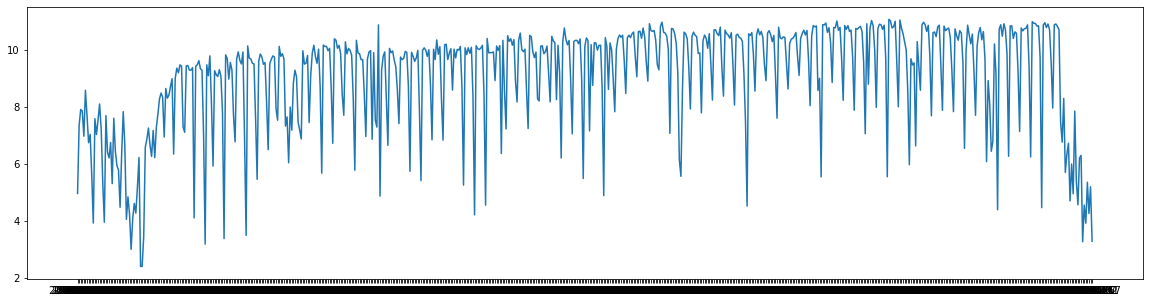

In [ ]:
#apply transformation which (reduce variance)penalize higher values more than smaller values.Lets take a log transform.
import numpy as np
ts_log = np.log(agg_sales_table)
plt.plot(ts_log)
plt.show()

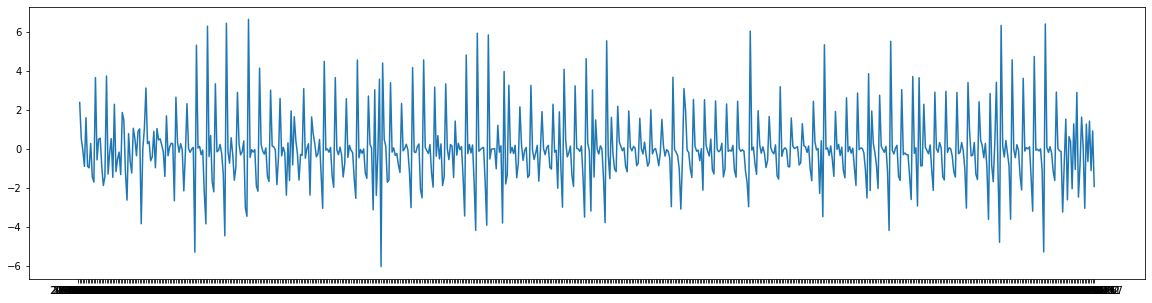

In [ ]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()

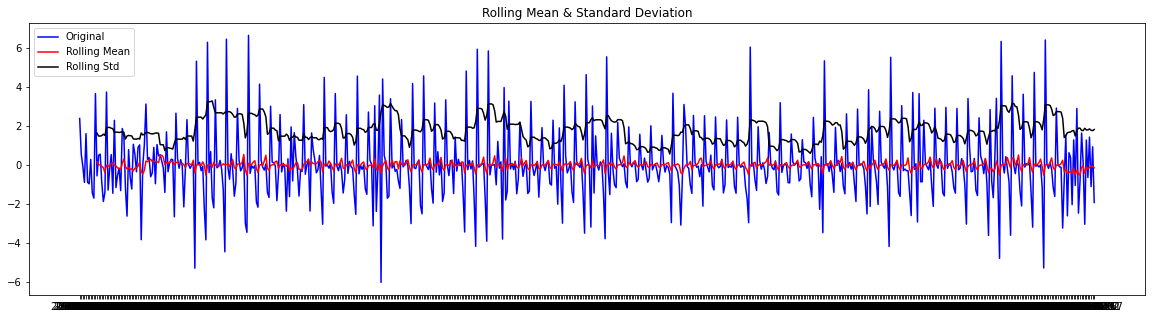

Results of Dickey-Fuller Test:
Test Statistic                -9.977464e+00
p-value                        2.158523e-17
#Lags Used                     1.200000e+01
Number of Observations Used    6.310000e+02
Critical Value (1%)           -3.440756e+00
Critical Value (5%)           -2.866131e+00
Critical Value (10%)          -2.569215e+00
dtype: float64


In [ ]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


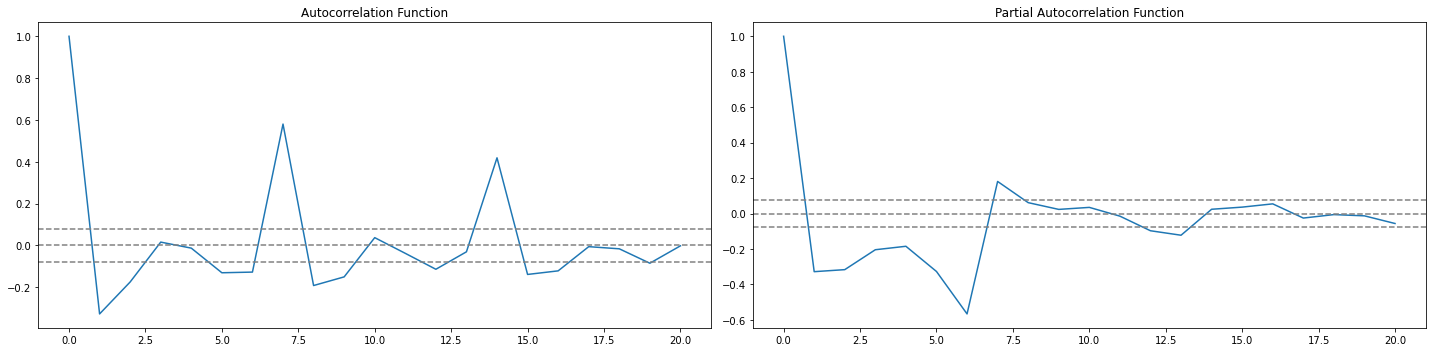

In [ ]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# ARIMA MODEL

In [ ]:
import warnings
import itertools
import numpy as np
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(ts_log_diff,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
        results = mod.fit()
        print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2578.503918929862
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2526.5197314113975
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3039.666678880503


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2532.210309876693
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2531.4318956858506


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2524.140858909004
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2776.952775933586


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2530.125626459222
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2331.026727514851


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2280.1038439091035
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2774.5939073677305


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2295.582079743828
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2291.565087666387


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2271.3818918801016


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2586.3577033498204


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2295.4002482979104
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3202.4532076863034
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3146.0542838512124
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:3619.5506857180026


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:3130.497146555882
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:3150.407714912822


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:3145.489358243783
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:3346.5954177584067


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:3135.5239633590804
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:2580.1934564846733


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2528.213896434002


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:3039.625345089943


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:2536.9741325039527


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:2536.873255999236


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2526.7979906010023


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:2781.899756250516


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:2536.2987367263217
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:2507.402531982308
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:2441.233560270317


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:2996.495575421557


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:2465.456749687531
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:2448.195527156873


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:2437.2184489213582
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:2729.684611796296


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:2452.944732090011
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:2316.308572979071


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2268.642003278582


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:2743.0510581641165


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:2281.0472961335186
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:2275.575340204591


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2262.334110585105


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:2542.229933952859


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:2281.609334395653
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:2965.7058157528263
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:2879.1608475104085


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:3471.692803500144


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2905.850946132957
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:2880.807601776339


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2880.9126470029314


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:3121.2877193481754


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:2873.899309135327
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:2509.121424677213


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2443.3762930844605


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:2996.786079087663


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:2470.260104243877


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:2453.7547962526587


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2440.2184418306883


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:2734.9277597387463


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:2459.478420486787


In [ ]:
#ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2262.3341105853733
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
len(ts_log)

645

In [ ]:
train_set=ts_log[:-15]

In [ ]:
test_set=ts_log[-15:]

In [ ]:
history = [x for x in train_set]
predictions = list()
for t in range(len(test_set)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_set[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=6.595381, expected=4.691348
predicted=5.345331, expected=5.985698
predicted=5.567210, expected=4.941571
predicted=5.279080, expected=7.847665
predicted=6.905822, expected=5.388158
predicted=6.194340, expected=4.553877
predicted=4.823747, expected=6.196098
predicted=5.661277, expected=6.289678
predicted=6.260731, expected=3.256942
predicted=4.241274, expected=4.543188
predicted=4.121055, expected=3.910021
predicted=4.113500, expected=5.347060
predicted=4.876622, expected=4.248495
predicted=4.605623, expected=5.187386
predicted=4.878854, expected=3.273364


In [ ]:
print("\033[1m Next 30 days sales predictions are: \033[0m" )
print(np.exp(model_fit.forecast(30)[0]))

 Next 30 days sales predictions are: 
[131.47983908 145.2751545  140.43679175 141.83031041 141.20125504
 141.23539807 141.05299029 140.94157446 140.80710094 140.68032416
 140.5511864  140.42297659 140.29461904 140.16646538 140.03840047
 139.91046183 139.78263705 139.65493004 139.52733938 139.39986539
 139.27250784 139.14526665 139.0181417  138.8911329  138.76424014
 138.6374633  138.5108023  138.38425701 138.25782733 138.13151316]
